In [1]:
words = open('/content/names.txt', 'r').read().splitlines()

In [2]:
words[:13]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth']

In [ ]:
# b = {}
# for w in words:
#     chars = ['<S>'] + list(w) + ['<E>']
#     for ch1, ch2 in zip(chars, chars[1:]):
#         bigram = (ch1, ch2)
#         b[bigram] = b.get(bigram, 0) + 1

In [ ]:
# sorted(b.items(), key = lambda kv: kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [3]:
import torch

In [4]:
N = torch.zeros((27,27), dtype=torch.int32)

In [6]:
chars = sorted(list(set(''.join(words))))

In [7]:
stoi = {s:i+1 for i,s in enumerate(chars)} #encoder for string to integer
stoi['.'] = 0 #special character for start and end
itos = {i:s for s,i in stoi.items()} #decoder for integer to string

In [8]:
print(stoi, "\n", itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0} 
 {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [9]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

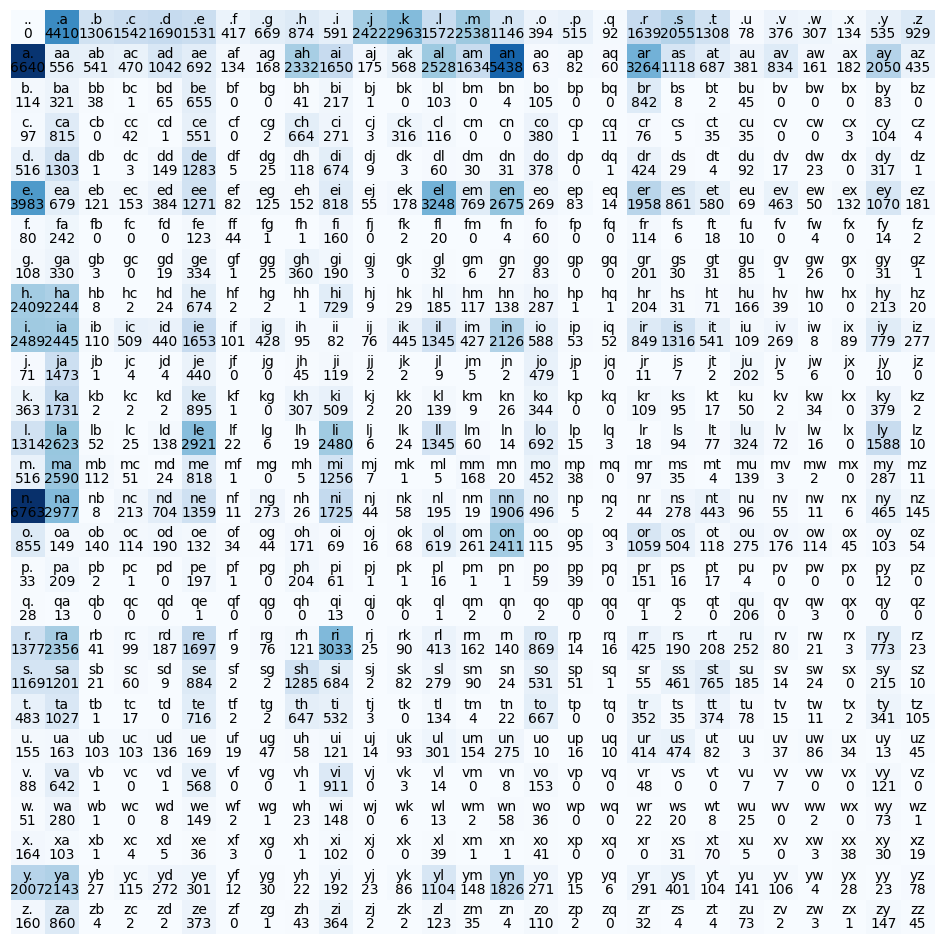

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        ch_seq = itos[i] + itos[j]
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')
        plt.text(j, i, ch_seq, ha='center', va='bottom', color='black')

plt.axis('off');

In [12]:
N[0].shape

torch.Size([27])

In [13]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [14]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [15]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [16]:
torch.multinomial(p, num_samples=1, replacement=True, generator=g) # gets samples from the prob matrix

tensor([0])

In [17]:
#g = torch.Generator().manual_seed(2147483647)


for i in range(50):
    out = []
    ix = 0
    while True:
        p = N[ix].float() #starting letter (first row)
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        #print(ix)
        if ix == 0:
            break
    print(''.join(out))


eeen.
milantlee.
taddasizelertek.
mahynsahamb.
museydale.
keya.
me.
trdhiha.
a.
rtan.
can.
ryiocalyonabeelily.
th.
l.
briarengelvah.
iazynla.
juesaz.
rikie.
riauurahe.
azlul.
gighan.
gedykelil.
dyn.
konomovilier.
sinan.
taniliceylel.
ch.
gosunon.
an.
thaneiemppai.
stalltrwa.
tara.
je.
kond.
be.
mer.
mir.
jam.
derantria.
javais.
whon.
kan.
elionamiemali.
pelsiallaei.
vianolera.
en.
aeawian.
vi.
brian.
ttemafi.
